## Test of Transient Impact Model

In [70]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [66]:
column_names = [
    "time", 
    "type",
    "order_id", 
    "size", 
    "price", 
    "direction"
]
aapl = pd.read_csv("../LOBSTER_SampleFile_AAPL_2012-06-21_50/AAPL_2012-06-21_34200000_37800000_message_50.csv", names = column_names)
msft = pd.read_csv("../LOBSTER_SampleFile_MSFT_2012-06-21_50/MSFT_2012-06-21_34200000_37800000_message_50.csv", names = column_names)
spy = pd.read_csv("../LOBSTER_SampleFile_SPY_2012-06-21_50/SPY_2012-06-21_34200000_37800000_message_50.csv", names = column_names)

In [67]:
aapl = aapl[aapl.type.isin([4, 5])]
msft = msft[msft.type.isin([4, 5])]
spy = spy[spy.type.isin([4, 5])]

In [27]:
def compute_normalized_volume(df: pd.DataFrame) -> tuple([float, float]):
    volume_sum = (df["size"] * df["direction"]).sum()
    volume_sum_abs = df["size"].sum()
    last_price = df["price"].to_list()[-1]
    return volume_sum / volume_sum_abs, last_price

In [120]:
def tim_pre_fit(df:pd.DataFrame, time_frame: float, df_name: str):
    t_0 = df["time"].to_list()[0]
    t_f = df["time"].to_list()[-1]
    norm_vol_list = []
    price_list = [df["price"].to_list()[0]]
    while t_0 < t_f:
        local_df = df[(df["time"] <= t_0 + time_frame) & (df["time"] >= t_0)]
        norm_volume, last_price = compute_normalized_volume(local_df)
        norm_vol_list.append(norm_volume)
        price_list.append(last_price)
        t_0 += time_frame
    norm_vol_array = np.array(norm_vol_list)
    price_array = np.array(price_list)
    return_array = - (price_array[1:] / 10000) + (price_array[:-1] / 10000)
    plt.plot(norm_vol_array)
    plt.title(f"Normalized Volume-{df_name}-{int(time_frame)}s")
    plt.show()
    plt.plot(price_array / 10000)
    plt.title(f"Price-{df_name}-{int(time_frame)}s")
    plt.show()
    plt.plot(return_array)
    plt.title(f"Price Shift (bp)-{df_name}-{int(time_frame)}s")
    plt.show()
    plt.scatter(norm_vol_array, return_array)
    plt.xlabel("Normalized Volume")
    plt.ylabel("Price Shift (bp)")
    plt.show()
    return norm_vol_array, return_array


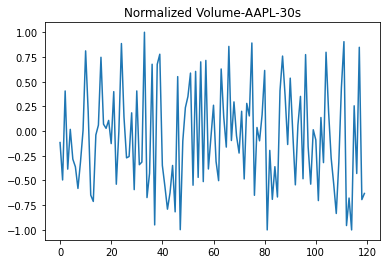

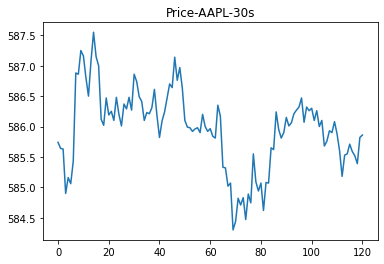

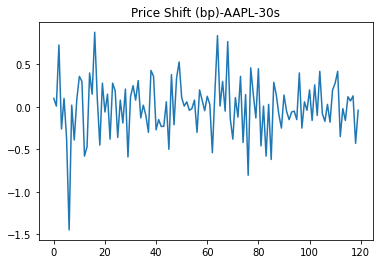

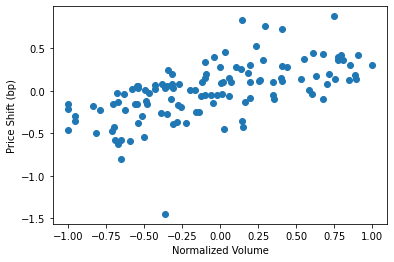

In [121]:
aapl_norm_vol, aapl_return = tim_pre_fit(aapl, 30, "AAPL")

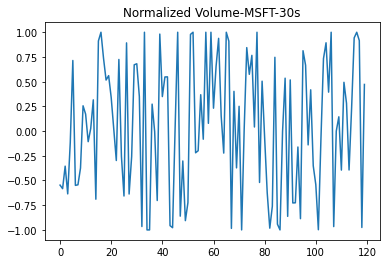

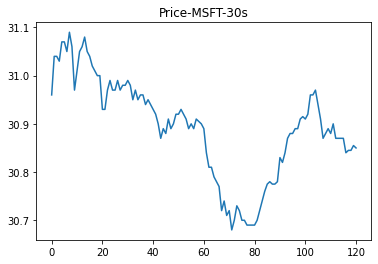

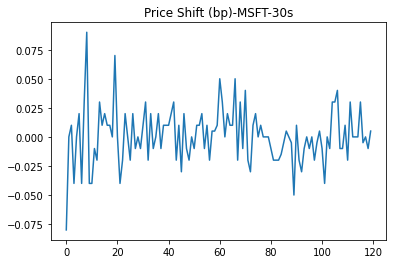

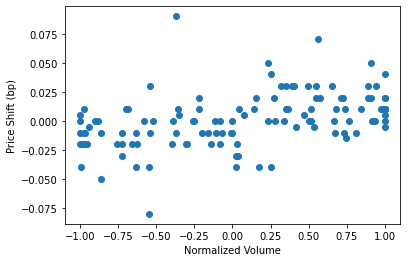

In [122]:
msft_vol, msft_return = tim_pre_fit(msft, 30, "MSFT")

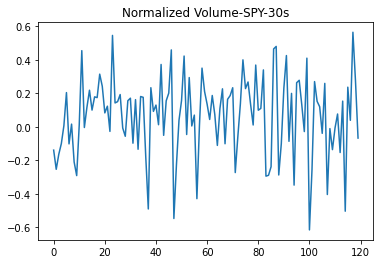

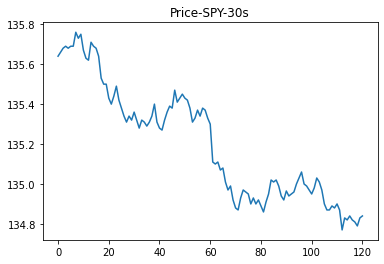

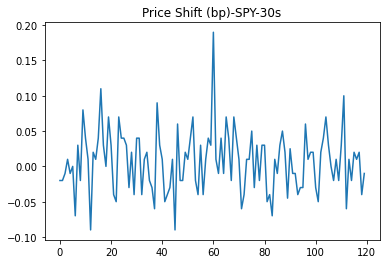

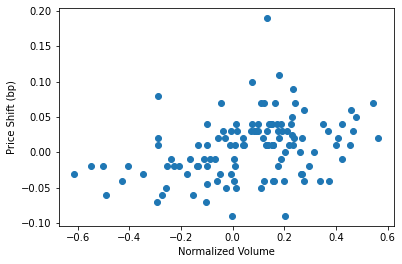

In [123]:
spy_vol, spy_return = tim_pre_fit(spy, 30, "SPY")